In [1]:
!git clone https://github.com/ieee8023/covid-chestxray-dataset.git

Cloning into 'covid-chestxray-dataset'...


In [1]:
import pandas as pd
import numpy as np
import os, shutil
from fastai.vision import *
from fastai.widgets import ClassConfusion

In [21]:
metadata_path='covid-chestxray-dataset/metadata.csv'
df=pd.read_csv(metadata_path)

#types we're interested in
covid_patients=df['finding']=='COVID-19'
CT=df['view']=='CT'
PA=df['view']=='PA'

# %%
df[covid_patients & CT].shape
df[covid_patients & PA].shape
# %%
PA_covid=df[covid_patients & PA]
Others=df[~covid_patients & PA]
covid_files=[files for files in PA_covid['filename']]
other_files=[files for files in Others['filename']]

In [22]:
#our test folder. manually included files via upload.
test_files=[file for file in sorted(os.listdir('test'))]
df_test=pd.DataFrame(test_files, columns=['filename'])


In [23]:
#create data folder and positive & negative cases folder, and test folder
destpath = 'data/covid','data/other', 'data/test'
srcpath = 'covid-chestxray-dataset/images'

for root, dirs, files in os.walk(srcpath):
  if not os.path.isdir(destpath[0]):
    os.makedirs(destpath[0])
  if not os.path.isdir(destpath[1]):
    os.makedirs(destpath[1])
  if not os.path.isdir(destpath[2]):
    os.makedirs(destpath[2])
  for file in files:
    if file in covid_files:
      shutil.copy(os.path.join(root, file),destpath[0])
    if file in other_files:
      shutil.copy(os.path.join(root,file),destpath[1])
    if file in test_files:
      shutil.copy(os.path.join(root,file)),destpath[2]

In [44]:
#see number of files
path, dirs, files2 = os.walk("data/other").__next__()
path, dirs, files1 = os.walk("data/covid").__next__()
path, dirs, files3 = os.walk("data/test").__next__()
print("Number of images in Other: {}".format(len(files2)),"Number of images in Covid: {}".format(len(files1)),"Number of images in Test Set: {}".format(len(files3)) )

Number of images in Other: 257 Number of images in Covid: 76 Number of images in Test Set: 83


In [45]:
classes=['covid','other']

In [46]:
data = ImageDataBunch.from_folder('data', train=".", valid_pct=0.25,test='test',
        ds_tfms=get_transforms(), bs=8, size=512, num_workers=4).normalize(imagenet_stats)

In [47]:
data.classes


['covid', 'other']

In [48]:
print(len(data.train_ds),len(data.valid_ds),len(data.test_ds.x))

250 83 83


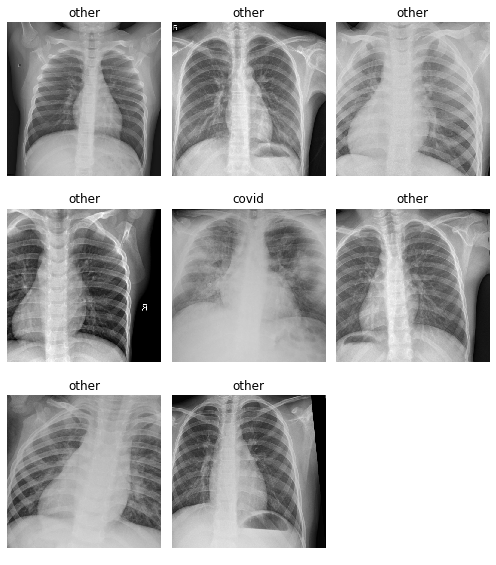

In [49]:
data.show_batch(rows=5, figsize=(7,8))

In [50]:
precision=Precision()
recall=Recall()
AUC=AUROC()

In [51]:
learn = cnn_learner(data, models.resnet50, metrics=(accuracy,precision,recall,AUC))

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to C:\Users\inzim/.cache\torch\checkpoints\resnet50-19c8e357.pth


In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,precision,recall,auroc,time
